本文档为博文[不均衡分类下的-ROC-与-PRC-曲线](https://libertydream.github.io/2020/01/11/%E4%B8%8D%E5%9D%87%E8%A1%A1%E5%88%86%E7%B1%BB%E4%B8%8B%E7%9A%84-ROC-%E4%B8%8E-PRC-%E6%9B%B2%E7%BA%BF/)配套代码

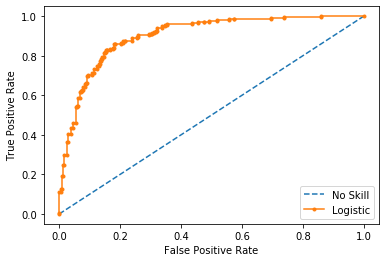

In [2]:
# 预测模型 ROC 曲线示例
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# 制作二分类数据集
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# 分割为训练集和测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# 训练模型
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# 预测概率
yhat = model.predict_proba(testX)

# 抽取正例预测概率
pos_pred = yhat[:,1]

# 画随机模型的 ROC
plt.plot([0,1], [0, 1], linestyle='--', label='No Skill')
# 计算模型 ROC
fpr, tpr, _ = roc_curve(testy, pos_pred)
# 画模型的 ROC
plt.plot(fpr, tpr, marker='.', label='Logistic')
# 坐标轴标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 加上图例
plt.legend()
# 呈现图像
plt.show()

# Precision-Recall Curve

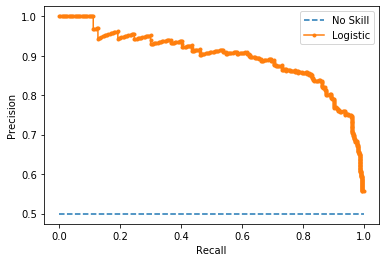

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

# 生成二分类数据集
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# 划分训练集、测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# 训练模型
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# 概率预测
yhat = model.predict_proba(testX)
# 取出正例概率
pos_pred = yhat[:,1]
# 计算随机模型的正例比例
no_skill = len(y[y==1]) / len(y)

# 绘制随机模型 PR 曲线
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
# 计算模型 PR 曲线值
precision, recall, _ = precision_recall_curve(testy, pos_pred)
# 绘制模型预测召回曲线
plt.plot(recall, precision, marker='.', label='Logistic')

# 坐标轴标签
plt.xlabel('Recall')
plt.ylabel('Precision')

# 图例与成像
plt.legend()
plt.show()

# 不均衡分类下的 ROC 与 PRC

In [7]:
# 制备不均衡数据集
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 普通二分类数据集
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

# 等比例划分数据集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# 数据摘要
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(trainy[trainy==0]), len(trainy[trainy==1])))
print('Test: Class0=%d, Class1=%d' % (len(testy[testy==0]), len(testy[testy==1])))

Dataset: Class0=985, Class1=15
Train: Class0=492, Class1=8
Test: Class0=493, Class1=7


No Skill ROC AUC 0.498
Logistic ROC AUC 0.869


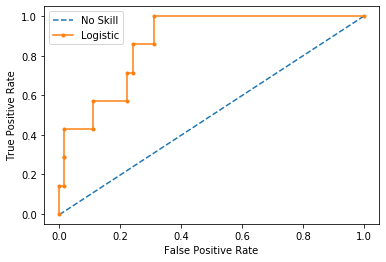

In [8]:
# 不均衡数据集上的 ROC 和 AUC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
# 绘制 ROC
def plot_roc_curve(test_y, naive_probs, model_probs):
    # 随机模型 ROC
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# 逻辑回归 ROC
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
    
	# 坐标轴
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	
    # 图例与成像
	pyplot.legend()
	pyplot.show()
 
# 普通二分类数据集
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# 等比例划分出训练集与测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# 随机模型，分类随机预测
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# 计算 AUC
roc_auc = roc_auc_score(testy, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

# 逻辑回归
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# 计算 AUC
roc_auc = roc_auc_score(testy, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

# 绘制图像
plot_roc_curve(testy, naive_probs, model_probs)

No Skill PR AUC: 0.007
Logistic PR AUC: 0.228


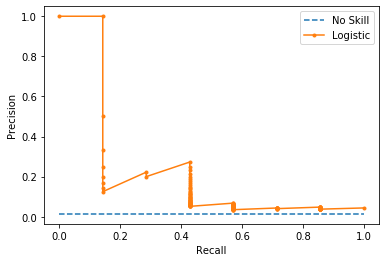

In [11]:
# 不均衡数据集上的 PRC 与 PRC AUC
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
 
# 绘制 PRC
def plot_pr_curve(test_y, model_probs):
    # 随机模型 PRC
    no_skill = len(test_y[test_y==1]) / len(test_y)
    pyplot.plot([0,1],[no_skill, no_skill], linestyle='--', label='No Skill')
    # 逻辑回归 PRC
    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker='.', label='Logistic')
    
    # 坐标轴
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    
    # 图例与成像
    pyplot.legend()
    pyplot.show()
 
# 普通二分类数据集
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# 等比例划分出训练集与测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# 随机模型，分类随机预测
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# 计算 PRC AUC
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# 逻辑回归
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# 计算 PRC AUC
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

# 绘制图像
plot_pr_curve(testy, model_probs)

Counter({0: 500})


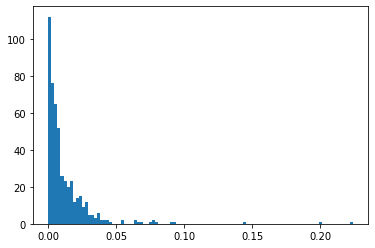

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

pos_pred = yhat[:, 1]

yhat = model.predict(testX)

print(Counter(yhat))

plt.hist(pos_pred, bins=100)
plt.show()


--------------------

**作者：** Daniel Meng

**博客：** [明月轩](https://libertydream.github.io/)

**GitHub:** [LibertyDream](https://github.com/LibertyDream)